<a href="https://colab.research.google.com/github/zixuantan/Databusters/blob/main/Q1'25_Linear_Model_(poor_performance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://raw.githubusercontent.com/zixuantan/Databusters/refs/heads/main/Quarterly%20Data.csv'

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# **Q1 2025 Model**

In [ ]:
quarterly_q1_linear = pd.read_csv(url)
quarterly_q1_linear.head()

## Data Cleaning

na_counts = quarterly_q1_linear.isna().sum()
na_df = na_counts[na_counts > 0].reset_index().sort_values(by = 0, ascending = False)
na_df.columns = ['Column', 'Number of Missing Values']
display(na_df)

# Remove columns with > 32 NAs

columns_to_drop = na_counts[na_counts > 32].index
quarterly_q1_linear_cleaned = quarterly_q1_linear.drop(columns=columns_to_drop)

print(f"Columns removed: {list(columns_to_drop)}")
print(f"Remaining columns: {quarterly_q1_linear_cleaned.shape[1]}")

# Remove all rows with NA values except last row

last_row_index = quarterly_q1_linear_cleaned.index[-1]
print(f"Last row index: {last_row_index}")
quarterly_cleaned = quarterly_q1_linear_cleaned.loc[quarterly_q1_linear_cleaned.index.isin([last_row_index]) | quarterly_q1_linear_cleaned.notna().all(axis=1)]
print(f"Rows remaining after cleaning: {quarterly_q1_linear_cleaned.shape[0]}")

# Handling NA values in last row
na_columns_last_row = quarterly_q1_linear_cleaned.loc[last_row_index][quarterly_q1_linear_cleaned.loc[last_row_index].isna()].index.tolist()
print("Variables with NA values in the last row:", na_columns_last_row)

# Checking for highly correlated variables
subset_data = quarterly_q1_linear_cleaned[na_columns_last_row]
correlation_matrix = subset_data.corr()
threshold = 0.8 # Filter correlations greater than the threshold
high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)]
high_correlation_list = high_correlation_pairs.stack().reset_index() # Convert to a list of variable pairs with high correlation
high_correlation_list.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_list = high_correlation_list[high_correlation_list['Variable 1'] < high_correlation_list['Variable 2']] # Remove duplicates
print("Highly correlated variable pairs (|correlation| > 0.8):")
print(high_correlation_list)
all_variables_in_high_correlation = pd.concat([
    high_correlation_list['Variable 1'],
    high_correlation_list['Variable 2']
]).unique().tolist()
print("List of all variables in high-correlation pairs:")
print(all_variables_in_high_correlation)


# Creating Stationary Variable

quarterly_q1_linear_cleaned['Quarterly_Growth_Rate'] = np.log(quarterly_q1_linear_cleaned['GDPC1']).diff()
quarterly_q1_linear_cleaned.loc[:2, 'Quarterly_Growth_Rate'] = np.nan
quarterly_q1_linear_cleaned['Annualized_GDP_Growth_Rate'] = 4 * 100 * quarterly_q1_linear_cleaned['Quarterly_Growth_Rate']
display(quarterly_q1_linear_cleaned)


,Column,Number of Missing Values
36,TWEXAFEGSMTHx,188
35,SPCS20RSA,164
37,EXUSEU,160
22,CPF3MTB3Mx,152
44,COMPAPFF,152
...,...,...
28,TNWBSHNOx,1
27,LIABPIx,1
26,TLBSHNOx,1
25,TABSHNOx,1


Columns removed: ['OUTMS', 'HOAMS', 'RSAFSx', 'ACOGNOx', 'ANDENOx', 'OILPRICEx', 'COMPRMS', 'OPHMFG', 'ULCMFG', 'MORTGAGE30US', 'MORTG10YRx', 'CPF3MTB3Mx', 'REVOLSLx', 'DRIWCIL', 'USSTHPI', 'SPCS10RSA', 'SPCS20RSA', 'TWEXAFEGSMTHx', 'EXUSEU', 'USEPUINDXM', 'CP3M', 'COMPAPFF', 'NASDAQCOM', 'CUSR0000SEHC']
Remaining columns: 222
Last row index: 264
Rows remaining after cleaning: 265
Variables with NA values in the last row: ['TABSHNOx', 'TLBSHNOx', 'LIABPIx', 'TNWBSHNOx', 'NWPIx', 'TARESAx', 'TFAABSHNOx', 'TLBSNNCBx', 'TLBSNNCBBDIx', 'TTAABSNNCBx', 'TNWMVBSNNCBx', 'TNWMVBSNNCBBDIx', 'TLBSNNBx', 'TLBSNNBBDIx', 'TABSNNBx', 'TNWBSNNBx', 'TNWBSNNBBDIx']
Highly correlated variable pairs (|correlation| > 0.8):
    Variable 1    Variable 2  Correlation
0     TABSHNOx      TLBSHNOx     0.961441
1     TABSHNOx     TNWBSHNOx     0.998940
3     TABSHNOx       TARESAx     0.997813
4     TABSHNOx    TFAABSHNOx     0.996952
5     TABSHNOx     TLBSNNCBx     0.990111
..         ...           ...        

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio,Quarterly_Growth_Rate,Annualized_GDP_Growth_Rate
0,factors,0.000,0.000,1.0000,1.0000,1.0000,0.000,0.0000,1.0000,1.0000,...,0.00,0.00,0.00,0.00,0.0000,1.0000,0.0000,0.0000,NaN,NaN
1,transform,5.000,5.000,5.0000,5.0000,5.0000,5.000,5.0000,5.0000,5.0000,...,1.00,5.00,5.00,2.00,5.0000,5.0000,2.0000,5.0000,NaN,NaN
2,3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211,NaN,NaN
3,6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899,0.022284,8.913675
4,9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544,0.000697,0.278810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,9/1/2023,22780.933,15646.695,1990.6487,10332.6348,3351.4410,4237.303,4128.6899,1292.2791,3400.8598,...,393231.81,22428933.20,13091.55,556.58,2352.1390,4458.1800,1.5504,24.3411,0.010658,4.263291
261,12/1/2023,22960.600,15781.367,2004.7389,10422.9997,3381.4939,4244.835,4164.7073,1294.6535,3432.9110,...,378868.07,22007297.84,12628.09,516.42,2445.3282,4471.5033,1.5669,24.6339,0.007856,3.142316
262,3/1/2024,23053.545,15856.867,1995.8869,10510.6699,3374.3097,4282.515,4231.1675,1295.7560,3470.9873,...,393141.73,21807600.89,12418.85,526.96,2356.6840,4999.3800,1.4143,26.8756,0.004040,1.615940
263,6/1/2024,23223.906,15967.266,2022.5443,10582.0770,3388.3416,4369.185,4255.4844,1326.4911,3504.1342,...,377370.30,21830151.14,12423.88,505.31,2458.6447,5254.2867,1.3632,27.5285,0.007363,2.945050


In [ ]:
# Determining lag for dependent variable - Annualised GDP Growth

max_lag = 12
for lag in range(1, max_lag + 1):
    quarterly_q1_linear_cleaned[f'Annualized_GDP_Growth_Lag_{lag}'] = quarterly_q1_linear_cleaned['Annualized_GDP_Growth_Rate'].shift(lag)

# Drop rows with NA values introduced by lagging
quarterly_q1_linear_cleaned = quarterly_q1_linear_cleaned.dropna()
#display(quarterly_cleaned)

aic_bic_results = []

# Fit models with different lag lengths
for lag in range(1, max_lag + 1):
    X_lagged = quarterly_q1_linear_cleaned[[f'Annualized_GDP_Growth_Lag_{i}' for i in range(1, lag + 1)]]
    y = quarterly_q1_linear_cleaned['Annualized_GDP_Growth_Rate']

    X_lagged = sm.add_constant(X_lagged)

    model = sm.OLS(y, X_lagged).fit()

    aic_bic_results.append({
        'Lag_Length': lag,
        'AIC': model.aic,
        'BIC': model.bic
    })

aic_bic_df = pd.DataFrame(aic_bic_results)
print(aic_bic_df.sort_values(by='AIC'))


    Lag_Length          AIC          BIC
0            1  1325.989734  1332.865893
1            2  1327.152777  1337.467015
2            3  1328.993143  1342.745460
3            4  1330.967669  1348.158066
4            5  1332.964016  1353.592491
5            6  1334.056988  1358.123543
6            7  1335.405235  1362.909870
7            8  1337.155010  1368.097724
8            9  1339.100325  1373.481118
9           10  1341.085749  1378.904621
10          11  1343.066021  1384.322973
11          12  1344.544668  1389.239699


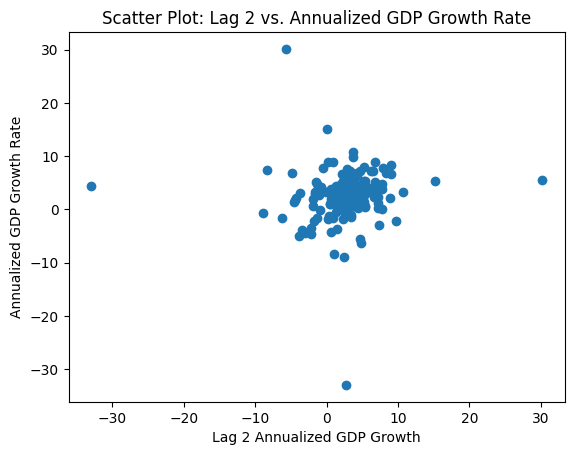

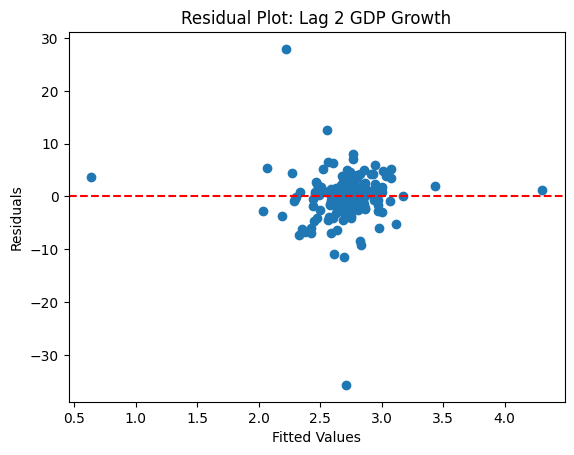

In [ ]:
## Checking for nonlinearity

# Scatter plot of GDP growth vs. Lag 2
plt.scatter(quarterly_cleaned['Annualized_GDP_Growth_Lag_2'], quarterly_cleaned['Annualized_GDP_Growth_Rate'])
plt.xlabel('Lag 2 Annualized GDP Growth')
plt.ylabel('Annualized GDP Growth Rate')
plt.title('Scatter Plot: Lag 2 vs. Annualized GDP Growth Rate')
plt.show()

X = sm.add_constant(quarterly_cleaned['Annualized_GDP_Growth_Lag_2'])
y = quarterly_cleaned['Annualized_GDP_Growth_Rate']

model = sm.OLS(y, X).fit()

# Plot residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Lag 2 GDP Growth')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
## Testing Polynomial Transformation for Lag 2

aic_bic_results1 = []

# Test polynomial degrees from 1 to 5
for degree in range(1, 6):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(quarterly_cleaned[['Annualized_GDP_Growth_Lag_2']])

    model_poly = sm.OLS(y, X_poly).fit()

    aic_bic_results1.append({
        'Degree': degree,
        'AIC': model_poly.aic,
        'BIC': model_poly.bic
    })

aic_bic_df1 = pd.DataFrame(aic_bic_results1)
print(aic_bic_df1.sort_values(by='AIC'))

   Degree          AIC          BIC
0       1  1263.276469  1270.045459
1       2  1263.876692  1274.030177
3       4  1265.568856  1282.491331
2       3  1265.710936  1279.248916
4       5  1266.539253  1286.846224


In [ ]:
## Testing transformations for Lag 2

# Transformations on Lag 2
quarterly_cleaned['Log_Annualized_GDP_Growth_Lag_2'] = np.log(np.abs(quarterly_cleaned['Annualized_GDP_Growth_Lag_2']) + 1)  # Handle negatives and zeroes
quarterly_cleaned['Sqrt_Annualized_GDP_Growth_Lag_2'] = np.sqrt(np.abs(quarterly_cleaned['Annualized_GDP_Growth_Lag_2']))  # Handle negatives by taking absolute value
quarterly_cleaned['Reciprocal_Annualized_GDP_Growth_Lag_2'] = 1 / (np.abs(quarterly_cleaned['Annualized_GDP_Growth_Lag_2']) + 1e-5)  # Avoid division by zero
quarterly_cleaned['CubicRoot_Annualized_GDP_Growth_Lag_2'] = np.cbrt(quarterly_cleaned['Annualized_GDP_Growth_Lag_2'])  # Handle negatives naturally with cubic root

# Set up dependent variable
y = quarterly_cleaned['Annualized_GDP_Growth_Rate']

# Test different transformations and compare AIC/BIC using OLS
aic_bic_results2 = []

# List of transformations
transformations = ['Log_Annualized_GDP_Growth_Lag_2', 'Sqrt_Annualized_GDP_Growth_Lag_2', 'Reciprocal_Annualized_GDP_Growth_Lag_2', 'CubicRoot_Annualized_GDP_Growth_Lag_2']

for transform in transformations:
    X = sm.add_constant(quarterly_cleaned[[transform]])

    model = sm.OLS(y, X).fit()

    aic_bic_results2.append({
        'Transformation': transform,
        'AIC': model.aic,
        'BIC': model.bic
    })

aic_bic_df2 = pd.DataFrame(aic_bic_results2).sort_values(by='AIC')
print("AIC and BIC values for different Lag 2 transformations:")
print(aic_bic_df2)


## Use Lag_2_Log

AIC and BIC values for different Lag 2 transformations:
                           Transformation          AIC          BIC
2  Reciprocal_Annualized_GDP_Growth_Lag_2  1255.869743  1262.638733
1        Sqrt_Annualized_GDP_Growth_Lag_2  1260.810041  1267.579031
0         Log_Annualized_GDP_Growth_Lag_2  1260.899027  1267.668017
3   CubicRoot_Annualized_GDP_Growth_Lag_2  1263.637572  1270.406562


<ipython-input-6-283bf0420fc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_cleaned['Log_Annualized_GDP_Growth_Lag_2'] = np.log(np.abs(quarterly_cleaned['Annualized_GDP_Growth_Lag_2']) + 1)  # Handle negatives and zeroes
<ipython-input-6-283bf0420fc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_cleaned['Sqrt_Annualized_GDP_Growth_Lag_2'] = np.sqrt(np.abs(quarterly_cleaned['Annualized_GDP_Growth_Lag_2']))  # Handle negatives by taking absolute value
<ipython-input-6-283bf0420fc6>

In [ ]:
## Baseline model

# Define dependent variable (annualized GDP growth rate)
y = quarterly_cleaned['Annualized_GDP_Growth_Rate']

X_baseline = sm.add_constant(quarterly_cleaned[['Reciprocal_Annualized_GDP_Growth_Lag_2']])

baseline_model = sm.OLS(y, X_baseline).fit()

# Baseline summary
print("Baseline Model Summary (Lag 2 Reciprocal only):")
print(baseline_model.summary())

Baseline Model Summary (Lag 2 Reciprocal only):
                                OLS Regression Results                                
Dep. Variable:     Annualized_GDP_Growth_Rate   R-squared:                       0.037
Model:                                    OLS   Adj. R-squared:                  0.032
Method:                         Least Squares   F-statistic:                     8.225
Date:                        Mon, 10 Feb 2025   Prob (F-statistic):            0.00454
Time:                                14:27:12   Log-Likelihood:                -625.93
No. Observations:                         218   AIC:                             1256.
Df Residuals:                             216   BIC:                             1263.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|

In [ ]:
## Checking remaining predictors for multicollinearity

# Select only numeric columns for correlation calculation
numeric_predictors = quarterly_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
predictor_corr_matrix = numeric_predictors.corr()

# Identify pairs of variables with correlation > 0.8
high_corr_pairs = predictor_corr_matrix[(predictor_corr_matrix.abs() > 0.8) & (predictor_corr_matrix.abs() < 1.0)]

# Display  highly correlated pairs
high_corr_list = high_corr_pairs.stack().reset_index().rename(columns={0: 'Correlation'})
high_corr_list = high_corr_list[high_corr_list['level_0'] < high_corr_list['level_1']]  # Remove duplicates
print("Highly correlated variable pairs (|correlation| > 0.8):")
print(high_corr_list)

to_drop = set()

# Loop through each pair and drop one of the variables
for _, row in high_corr_list.iterrows():
    var1, var2 = row['level_0'], row['level_1']

    # Keep the variable with the higher correlation to GDP growth
    if abs(numeric_predictors[var1].corr(quarterly_cleaned['Annualized_GDP_Growth_Rate'])) >= abs(numeric_predictors[var2].corr(quarterly_cleaned['Annualized_GDP_Growth_Rate'])):
        to_drop.add(var2)
    else:
        to_drop.add(var1)

# print(to_drop)
print(len(to_drop))
print(len(numeric_predictors))

# Drop highly correlated variables
quarterly_cleaned = quarterly_cleaned.drop(columns=to_drop)
print(f"Dropped variables due to high correlation: {to_drop}")

Highly correlated variable pairs (|correlation| > 0.8):
                               level_0                                level_1  \
0                                GDPC1                                PCECC96   
1                                GDPC1                                  PCDGx   
2                                GDPC1                                 PCESVx   
3                                GDPC1                                  PCNDx   
4                                GDPC1                                 GPDIC1   
...                                ...                                    ...   
17915                    S&P div yield                                 USFIRE   
17916                    S&P div yield                                  USPBS   
17917                    S&P div yield                                 USSERV   
17926      Annualized_GDP_Growth_Lag_2  CubicRoot_Annualized_GDP_Growth_Lag_2   
17927  Log_Annualized_GDP_Growth_Lag_2       Sqrt_Ann

In [ ]:
## Checking correlation between remaining predictors and Annualized_GDP_Growth_Rate

# Calculate correlation of remaining predictors with the target
remaining_predictors = quarterly_cleaned.select_dtypes(include=[np.number]).drop(columns=['Annualized_GDP_Growth_Rate'])
target_corr = remaining_predictors.corrwith(quarterly_cleaned['Annualized_GDP_Growth_Rate'])

# Display correlations sorted by magnitude
print("Correlations with Annualized GDP Growth:")
print(target_corr.sort_values(ascending=False))

# Manually select key variables to retain (modify this list as needed)
key_variables = [
    'UMCSENTx', 'CUMFNS', 'HOUST', 'HOUST5F', 'AWHMAN', 'AWHNONAG',
    'T5YFFM', 'TB3SMFFM', 'VIXCLSx', 'BAA10YM', 'CLAIMSx', 'UEMPLT5'
]

# Identify variables to keep based on correlation or theoretical importance
selected_predictors = target_corr[abs(target_corr) >= 0.2].index.tolist()

for variable in key_variables:
    if variable not in selected_predictors and variable in quarterly_cleaned.columns:
        selected_predictors.append(variable)
        print(f"Re-added key variable: {variable}")

# Remove "Quarterly Growth Rate"
selected_predictors.remove('Quarterly_Growth_Rate')

# Display final list of selected predictors
print("Final selected predictors for lag testing:")
print(selected_predictors)

Correlations with Annualized GDP Growth:
Quarterly_Growth_Rate                     1.000000
A014RE1Q156NBEA                           0.370275
HOUST                                     0.328573
UMCSENTx                                  0.291154
CUMFNS                                    0.243832
AWHMAN                                    0.232307
HOUST5F                                   0.204960
Reciprocal_Annualized_GDP_Growth_Lag_2    0.191523
T5YFFM                                    0.161050
TB3SMFFM                                  0.152084
Sqrt_Annualized_GDP_Growth_Lag_2          0.120836
AWHNONAG                                  0.119658
GS1TB3Mx                                  0.099236
PRFIx                                     0.094185
S&P PE ratio                              0.082668
TB6M3Mx                                   0.075683
CES9091000001                             0.063211
Annualized_GDP_Growth_Lag_2               0.058217
DDURRG3Q086SBEA                          

In [ ]:
max_lags = 12

# Create lagged variables
for predictor in selected_predictors:
    for lag in range(1, max_lags + 1):
        lagged_col = f'{predictor}_Lag_{lag}'
        quarterly_cleaned[lagged_col] = quarterly_cleaned[predictor].shift(lag)

# Drop rows with NaN values introduced by lagging
quarterly_cleaned = quarterly_cleaned.dropna()

y = quarterly_cleaned['Annualized_GDP_Growth_Rate']

# Initialize base model
base_predictor = 'Reciprocal_Annualized_GDP_Growth_Lag_2'
X_base = sm.add_constant(quarterly_cleaned[[base_predictor]])
best_aic = sm.OLS(y, X_base).fit().aic
final_model = None
current_predictors = [base_predictor]

print(f"Base Model AIC: {best_aic}\n")

# Incrementally test each predictor's lags and build the model
for predictor in selected_predictors:
    best_lag_aic = best_aic  # Store the best AIC for the current predictor
    selected_lag = None  # Track the best lag for the current predictor

    for lag in range(1, max_lags + 1):
        lagged_col = f'{predictor}_Lag_{lag}'

        if lagged_col in quarterly_cleaned.columns:
            X_new = sm.add_constant(quarterly_cleaned[current_predictors + [lagged_col]])
            model = sm.OLS(y, X_new).fit()

            print(f"Testing {predictor} (Lag {lag}) | AIC: {model.aic}, BIC: {model.bic}")

            # Check if the current lag improves the AIC
            if model.aic < best_lag_aic:
                best_lag_aic = model.aic
                selected_lag = lagged_col
                final_model = model

    # If a lagged variable was selected, add it to the current best predictors
    if selected_lag:
        print(f"Selected {predictor} (Lag {selected_lag}) for the model.")
        current_predictors.append(selected_lag)
        best_aic = best_lag_aic  # Update the best AIC for the next iteration

# Final Model Summary
print("\nFinal Model Summary:")
print(final_model.summary())

print("List of current predictors:")
print(current_predictors)

from sklearn.metrics import mean_squared_error


y_pred = final_model.fittedvalues
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"\nRoot Mean Square Error (RMSE): {rmse:.2f}")

Base Model AIC: 1116.186288884372

Testing A014RE1Q156NBEA (Lag 1) | AIC: 1115.7922394461132, BIC: 1125.5958139233032
Testing A014RE1Q156NBEA (Lag 2) | AIC: 1117.7538412735857, BIC: 1127.5574157507758
Testing A014RE1Q156NBEA (Lag 3) | AIC: 1117.912317578596, BIC: 1127.715892055786
Testing A014RE1Q156NBEA (Lag 4) | AIC: 1117.2386128355429, BIC: 1127.042187312733
Testing A014RE1Q156NBEA (Lag 5) | AIC: 1118.1693281761195, BIC: 1127.9729026533096
Testing A014RE1Q156NBEA (Lag 6) | AIC: 1117.9841443309092, BIC: 1127.7877188080993
Testing A014RE1Q156NBEA (Lag 7) | AIC: 1118.1862837505314, BIC: 1127.9898582277215
Testing A014RE1Q156NBEA (Lag 8) | AIC: 1117.9949141902116, BIC: 1127.7984886674017
Testing A014RE1Q156NBEA (Lag 9) | AIC: 1118.1797708199788, BIC: 1127.9833452971689
Testing A014RE1Q156NBEA (Lag 10) | AIC: 1118.0452157896063, BIC: 1127.8487902667964
Testing A014RE1Q156NBEA (Lag 11) | AIC: 1117.4898461048797, BIC: 1127.2934205820698
Testing A014RE1Q156NBEA (Lag 12) | AIC: 1118.07857486

Mean Squared Error (MSE): 68.27
Mean Absolute Error (MAE): 8.08


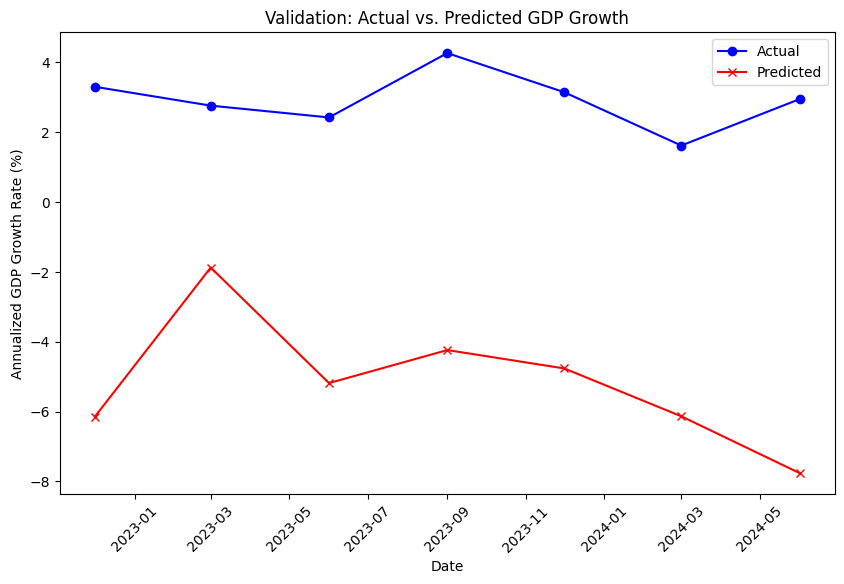

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

quarterly_cleaned['sasdate'] = pd.to_datetime(quarterly_cleaned['sasdate'])

# Define training and testing (validation) sets
train = quarterly_cleaned.loc[quarterly_cleaned['sasdate'] <= '2022-09-30']  # Up to Q3 2022
test = quarterly_cleaned.loc[quarterly_cleaned['sasdate'] > '2022-09-30']  # From Q4 2022 to Q3 2024

# Set up the dependent and independent variables
y_train = train['Annualized_GDP_Growth_Rate']
y_test = test['Annualized_GDP_Growth_Rate']

X_train = sm.add_constant(train[current_predictors])
X_test = sm.add_constant(test[current_predictors])

# Train the model on  training set
final_model = sm.OLS(y_train, X_train).fit()

# Predict on  testing set
predictions = final_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Predictions vs. actuals
plt.figure(figsize=(10, 6))
plt.plot(test['sasdate'], y_test, label="Actual", marker='o', color='blue')
plt.plot(test['sasdate'], predictions, label="Predicted", marker='x', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Annualized GDP Growth Rate (%)")
plt.title("Validation: Actual vs. Predicted GDP Growth")
plt.xticks(rotation=45)
plt.show()

In [ ]:
prediction_input = {'const': 1}  # Include the constant term

# Identify the latest available row for Q3 2024
latest_index = quarterly_cleaned.index[-1]

# Loop through predictors in the final model and retrieve lagged values
for predictor in final_model.model.exog_names:
    if predictor == 'const':
        continue

    if '_Lag_' in predictor:
        base_variable, lag_number = predictor.rsplit('_Lag_', 1)
        lag_number = int(lag_number.strip())
    else:
        raise KeyError(f"Unexpected predictor format: {predictor}")

    # Construct the correct lagged column name
    lagged_col = f'{base_variable}_Lag_{lag_number}'
    if lagged_col not in quarterly_cleaned.columns:
        raise KeyError(f"Column '{lagged_col}' not found in the dataset.")

    # Retrieve the value at the correct lag
    try:
        prediction_value = quarterly_cleaned.loc[latest_index - lag_number, lagged_col]
    except KeyError as e:
        raise KeyError(f"Unable to find lagged value for '{lagged_col}' at lag {lag_number}.") from e

    # Add the value to the prediction input
    prediction_input[predictor] = prediction_value

# Convert prediction input into a DataFrame
prediction_df = pd.DataFrame([prediction_input])

# Make the prediction
predicted_growth = final_model.predict(prediction_df)[0]
print(f"Predicted Annualized GDP Growth Rate for Q1 2025: {predicted_growth:.2f}%")

Predicted Annualized GDP Growth Rate for Q1 2025: 1.12%
